In [62]:
import timeit
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [63]:
x,y =make_blobs(n_samples=1000)
#print(x,y)
print(type(x))

<class 'numpy.ndarray'>


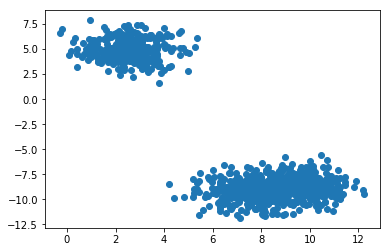

In [64]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [65]:
print(x.shape)
print(y.shape)
print(type(x))

(1000, 2)
(1000,)
<class 'numpy.ndarray'>


In [82]:
# sorting the data-set using the column having maximum range among all the columns , it is valid for multidimensional dataset.
max_range_col_index=0
max_range_of_col=max(x[:,0])-min(x[:,0])
no_of_col = x.shape[1]

for col in range(1,no_of_col):
    range_of_col=max(x[:,col])-min(x[:,col])
    if range_of_col>max_range_of_col:
        max_range_of_col=range_of_col
        max_range_col_index=col
        

    
        
        
        

In [83]:
print(type(x))
x=sorted(x,key=lambda z:z[max_range_col_index])
print(type(x))
x=np.array(x)
print(type(x))

<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.ndarray'>


In [84]:
%matplotlib inline
import time
import hashlib
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs


def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        
        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

In [85]:
k, gapdf = optimalK(x, nrefs=5, maxClusters=5)
print(k)

2


In [86]:
print(type(x))
centers=[]

for i in range(k,x.shape[0]-k):
    centers.append(x[i]);
    

<class 'numpy.ndarray'>


In [87]:
print(centers) # coordinates  of the assigned centroid.

[array([  7.00571486, -11.60769014]), array([  8.05963388, -11.58891435]), array([  5.44158316, -11.53909939]), array([  8.91185453, -11.53308508]), array([  8.45199367, -11.51888044]), array([  9.31841933, -11.50312267]), array([  8.97591123, -11.48129763]), array([  8.67023419, -11.46147116]), array([  8.01312955, -11.44475737]), array([  6.53522089, -11.33211003]), array([  7.38598226, -11.30538149]), array([  8.15984781, -11.23875822]), array([ 10.97754698, -11.21470649]), array([  6.31591723, -11.19386695]), array([ 10.33955919, -11.11729806]), array([  8.4737599 , -11.08872673]), array([  5.59730596, -11.07982621]), array([  7.18670189, -11.05195384]), array([  9.56078584, -11.04141647]), array([  8.04737852, -11.03009186]), array([  6.73746776, -11.00114101]), array([ 10.69906164, -10.98388821]), array([  8.10663371, -10.98057285]), array([  7.72910792, -10.97147511]), array([  7.79780817, -10.92213501]), array([  8.66317669, -10.8764043 ]), array([  6.70068705, -10.85417036]), 

In [88]:
color=['green','red','blue','yellow','orange']

clusters={}

for i in range(k):
    #center = 10*(2*np.random.random((x.shape[1],))-1)
    points=[]
    
    cluster={
         'center':centers[i],
         'points' :points,
         'colour':color[i]
        
    }
    
    clusters[i]=cluster
    
clusters

{0: {'center': array([  7.00571486, -11.60769014]),
  'points': [],
  'colour': 'green'},
 1: {'center': array([  8.05963388, -11.58891435]),
  'points': [],
  'colour': 'red'}}

In [89]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [90]:
# assigning points to clusters(E-step of expectation maximization problem)
# K-Means is the special case of expectation maximization problem
def assign_points_to_clusters(clusters):
    # iterating in every cluster
    for i in range(x.shape[0]):
        dist_of_this_point_from_every_cluster_center = []
        current_point=x[i]
    
    # now iterating in every cluster
        for kx in range(k):
            distance_from_center=distance(current_point,clusters[kx]['center'])
            dist_of_this_point_from_every_cluster_center.append(distance_from_center)
        
        current_cluster=np.argmin(dist_of_this_point_from_every_cluster_center)
        clusters[current_cluster]['points'].append(current_point)
        #print(clusters[current_cluster]['points'])

        
    
    

In [91]:
assign_points_to_clusters(clusters)
print(x.shape[0])

1000


In [92]:
def updateClusters(clusters):   # M-step -> we update every cluster center acording to mean of the cluster
    
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0:
            new_center = pts.mean(axis=0)
            clusters[kx]['center']=new_center
            clusters[kx]['points']=[]



def plotclusters(clusters):
    
    for kx in range(k):
        #print(type(clusters[kx]['points']))
        #print(len(clusters[kx]['points']))
        
        pts = np.array(clusters[kx]['points'])
        
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['colour'])
        except:
            pass
        
        uk=clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color='black',marker="*")
    

    

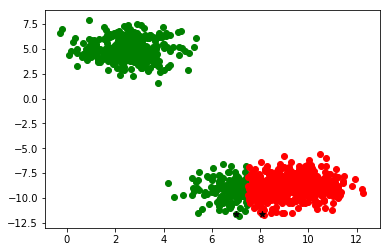

In [93]:
plotclusters(clusters)

Time:  0.1505390022561528


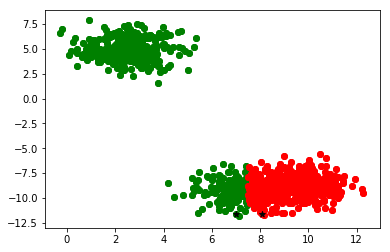

In [94]:
# JUst one iteration to test stability
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)
stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  0.13019491152795126


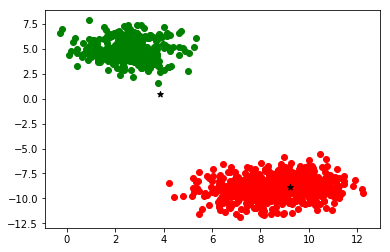

In [95]:
# JUst one iteration to test stability
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)
stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  0.2753456689992504


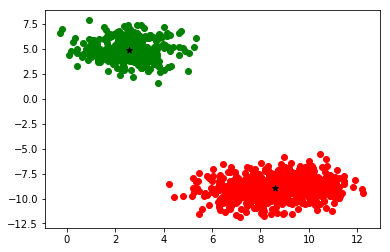

In [96]:
# JUst one iteration to test stability
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)
stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  0.14653149766655815


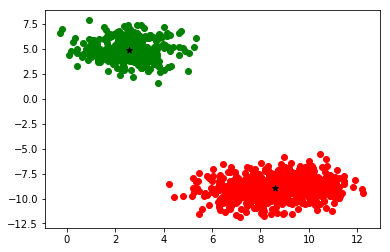

In [97]:
# JUst one iteration to test stability
start = timeit.default_timer()
assign_points_to_clusters(clusters)
plotclusters(clusters)
updateClusters(clusters)
stop = timeit.default_timer()

print('Time: ', stop - start)  